# The Colonial Origins of Comparative Development: An Empirical Investigation

This problem is based on article by Acemoglu, Daron, Simon Johnson and James
A. Robinson. Colonial Origins of Comparative Development: An Empirical Analysis
Research, American Economic Review, 2001, vol. 91 (5). At the moment 
the article has about two thousand citations and
ranks 8th in the list of the most cited articles from the top 5 scientific economic journals in the world.

The authors test the hypothesis that the quality of institutions is important for ensuring high rates of economic growth. More precisely, countries where property rights are better protected have an advantage in capital accumulation, which ultimately leads to higher long-term GDP per capita.

Source data file: ``Acemoglu``.

The file contains information about the following variables:

``countryn`` - country name, ``shortnam`` - short country code,

``lgdp`` - logarithm of GDP per capita in 1995,

``logmort`` - logarithm of the mortality rate of colonists (see details in the text of the article)

``latitude`` - the latitude at which the capital of a given country is located (measured as a distance from the equator and normalized so as to vary from zero to one)

``prot`` - an index of protection of property rights in a given country (the measure is arranged so that higher values correspond to better protection of property rights)

``euro`` is the proportion of the population of European descent in a given country as of 1975.


In the task, you are invited to reproduce the main results of the authors of the article, following their logic. 

(a) Construct a scatter diagram characterizing the dependence of the ``lgdp`` variable on the ``prot`` variable. Estimate the parameters of the corresponding pairwise regression using ordinary OLS. 
Why the resulting dependence cannot be interpreted as a cause-and-effect relationship? 

In [1]:
library(foreign)
data <- read.dta("Acemoglu.dta")

In [2]:
data

,countryn,shortnam,africa,latitude,euro,prot,lgdp,logmort
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Angola,AGO,1,0.13666667,0,5.363636,7.770645,5.634789
2,Argentina,ARG,0,0.37777779,90,6.386364,9.133459,4.262680
3,Australia,AUS,0,0.30000001,99,9.318182,9.897972,2.145931
4,Burkina Faso,BFA,1,0.14444445,0,4.454545,6.845880,5.634789
5,Bangladesh,BGD,0,0.26666668,0,5.136364,6.877296,4.268438
6,Bahamas,BHS,0,0.26833332,10,7.500000,9.285448,4.442651
7,Bolivia,BOL,0,0.18888889,30,5.636364,7.926602,4.262680
8,Brazil,BRA,0,0.11111111,55,7.909091,8.727454,4.262680
9,Canada,CAN,0,0.66666669,98,9.727273,9.986449,2.778819


In [3]:
library(ggplot2)

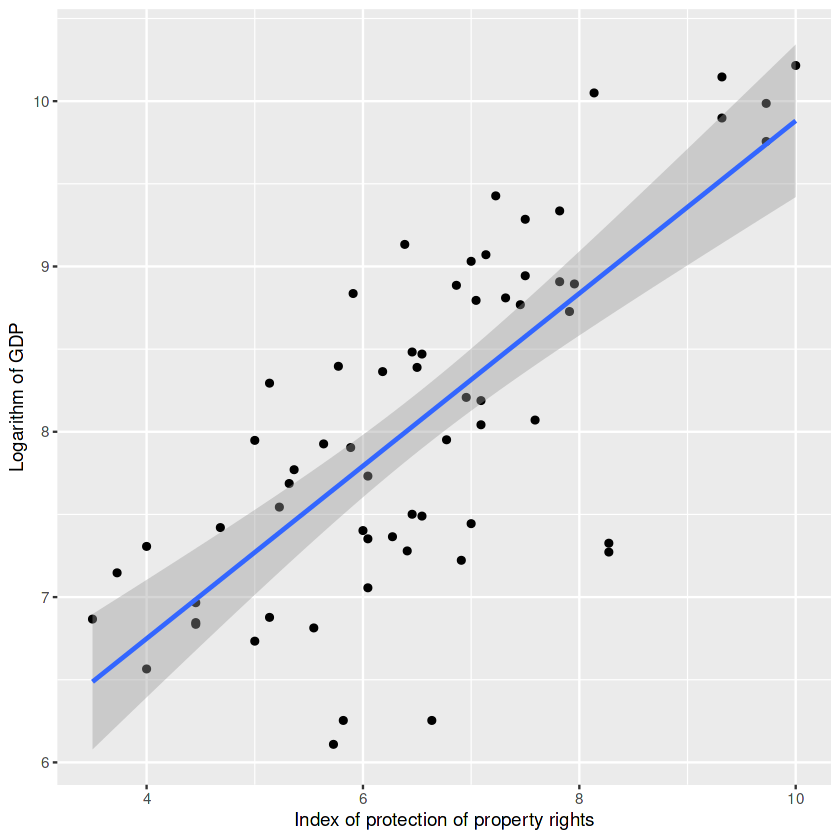

In [4]:
ggplot(data, aes(x=prot, y=lgdp)) + geom_point() + geom_smooth(method='lm',formula=y~x) + 
  xlab("Index of protection of property rights") +
  ylab("Logarithm of GDP")

In [6]:
model_a <- lm(data = data, lgdp~prot)
summary(model_a)


Call:
lm(formula = lgdp ~ prot, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8715 -0.4644  0.1683  0.4610  1.1413 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.66038    0.40851  11.408  < 2e-16 ***
prot         0.52211    0.06119   8.533 4.72e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7132 on 62 degrees of freedom
Multiple R-squared:  0.5401,	Adjusted R-squared:  0.5327 
F-statistic: 72.82 on 1 and 62 DF,  p-value: 4.724e-12


(b) Estimate the new regression including ``latitude`` in the original equation. Based on the authors' logic, explain why latitude might be an important control variable in this case. Interpret your results. Do they confirm that latitude is really an important variable? 

In [7]:
model_a <- lm(data = data, lgdp~prot+latitude)
summary(model_a)


Call:
lm(formula = lgdp ~ prot + latitude, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6845 -0.4233  0.1408  0.4584  1.1858 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.72808    0.39732  11.900  < 2e-16 ***
prot         0.46789    0.06416   7.292 7.29e-10 ***
latitude     1.57688    0.71031   2.220   0.0301 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6917 on 61 degrees of freedom
Multiple R-squared:  0.5745,	Adjusted R-squared:  0.5605 
F-statistic: 41.18 on 2 and 61 DF,  p-value: 4.805e-12


(c) Before proceeding with 2SLS, estimate the equation of the reduced form: the regression of the ``lgdp`` on the mortality of settlers ``logmort``. Make a scatterplot characterizing this relationship. How can you explain the results obtained? 

In [8]:
model_c <- lm(data=data, lgdp ~ logmort)  
summary(model_c) 


Call:
lm(formula = lgdp ~ logmort, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7419 -0.5325  0.1507  0.4693  1.4110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.70759    0.37481  28.568  < 2e-16 ***
logmort     -0.56980    0.07802  -7.304  6.4e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7711 on 62 degrees of freedom
Multiple R-squared:  0.4625,	Adjusted R-squared:  0.4538 
F-statistic: 53.34 on 1 and 62 DF,  p-value: 6.403e-10


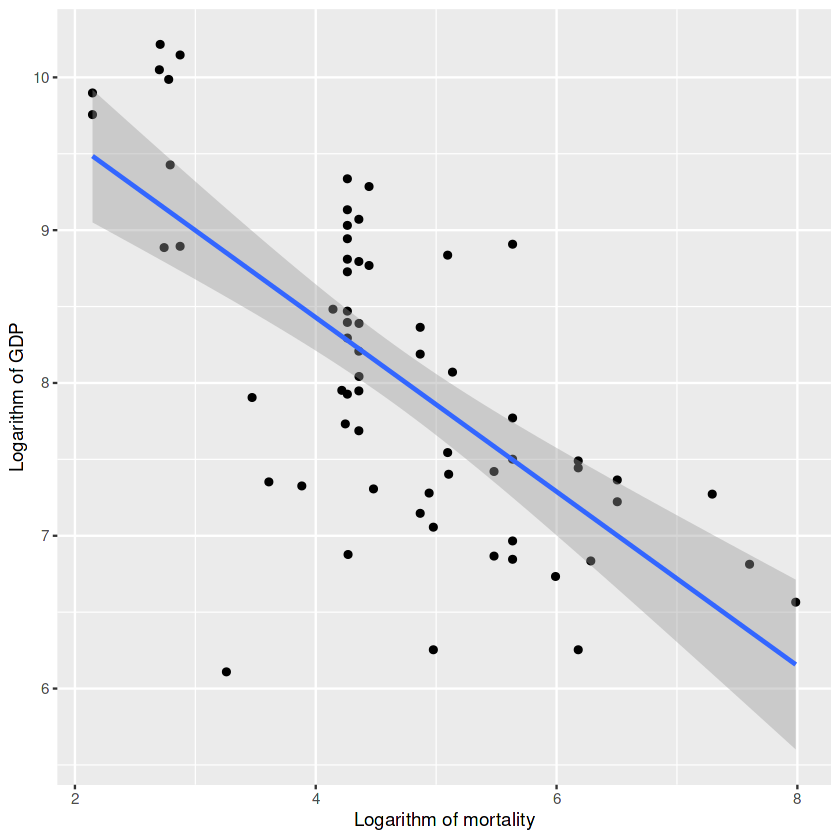

In [9]:
ggplot(data, aes(x = logmort, y=lgdp)) + geom_point() + geom_smooth(method='lm',formula=y~x) + xlab("Logarithm of mortality") +
  ylab("Logarithm of GDP")

(d) We now turn to assessing the impact of the quality of institutions on the logarithm of GDP using 2SLS. Use the ``logmort`` variable as an instrument. Explain meaningfully why the authors consider this tool valid, and why such an empirical strategy makes it possible to correctly test the presence of a causal relationship between the quality of institutions and GDP. 

In [10]:
library(AER)

Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival



In [11]:
tsls_d <- ivreg(lgdp ~ prot|logmort, data=data )

In [12]:
summary(tsls_d, diagnostics=T)


Call:
ivreg(formula = lgdp ~ prot | logmort, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.40124 -0.55430  0.07021  0.66539  1.64168 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.0869     0.9853   2.118   0.0382 *  
prot          0.9171     0.1502   6.106 7.35e-08 ***

Diagnostic tests:
                 df1 df2 statistic  p-value    
Weak instruments   1  62     23.82 7.76e-06 ***
Wu-Hausman         1  61     21.23 2.13e-05 ***
Sargan             0  NA        NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9223 on 62 degrees of freedom
Multiple R-Squared: 0.231,	Adjusted R-squared: 0.2186 
Wald test: 37.29 on 1 and 62 DF,  p-value: 7.354e-08 


(e) Estimate the regression of the first step of 2SLS. Illustrate the result with a scatter plot. After calculating the appropriate F-statistic, explain whether the instrument used is strong (relevant). 

In [ ]:
first_step <- lm(prot~logmort, data)

In [ ]:
summary(first_step)

In [ ]:
ggplot(data, aes(x=logmort, y=prot)) + geom_point() + geom_smooth(method='lm',formula=y~x)  + xlab("Logarithm of mortaility") +
  ylab("Index of protection of property rights")

(f) Estimate the second step regression. Interpret the results obtained. How has the estimate of the impact of the quality of institutions on GDP changed compared to the estimate obtained with OLS? What does this change say about the cause of the endogeneity of the regressor (which of the causes of endogeneity prevailed in the original model)? 

In [ ]:
prot_est <- first_step$fitted.values

In [ ]:
second_step <- lm(lgdp ~ prot_est, data = data )

In [ ]:
summary(second_step)

(g) Evaluate the alternative specification of 2SLS regression  adding a control variable.  Is the conclusion about the positive impact of the quality of institutions on GDP sustainable? 

In [ ]:
tsls_g <- ivreg(lgdp ~ prot + latitude|logmort+latitude, data=data )
summary(tsls_g, diagnostics=T)

In [ ]:
first_step <- lm(prot ~ logmort + latitude , data=data)
summary(first_step)

prot_est_g <- first_step$fitted.values

second_step <- lm(lgdp ~ prot_est_g + latitude , data=data)
summary(second_step)

(h) Another way to test the robustness of the results is by analyzing individual subsamples. Construct the regressions from the two previous paragraphs using only data for all countries except African. Then build two similar models using a subsample of African countries only.
Compare estimates of the impact of institutional quality on GDP in 
this subsample with those in the base sample. Is the analyzed effect heterogeneous? What problems with the quality of the models do you see?

In [ ]:
newdata <- subset(data, africa==0)

In [ ]:
tsls_h <- ivreg(lgdp ~ prot|logmort, data=newdata )
summary(tsls_h, diagnostics=T)

In [ ]:
tsls_i <- ivreg(lgdp ~ prot + latitude|logmort+latitude, data=newdata )
summary(tsls_i, diagnostics=T)

(i) Suppose a critic asserts the following: “Settler mortality is correlated not only with the quality of institutions, but also with the proportion of the population of European origin in a given country (variable euro). Due to the peculiarities of the colonization process in some countries, the proportion of the European population is much higher than that of the indigenous population and sometimes approaches 100 percent. Moreover, this share itself affects the value of GDP: the more people with European origin in the country, the more GDP, even with the same quality of institutions."

In other words, the critic argues that the high per capita GDP in former colonies such as the United States, Canada and Australia is primarily due not to the quality of institutions, but to the high proportion of the population of European descent in the total population of these countries.

If the critic is right, how does this affect the consistency of the 2SLS  estimates in the regressions constructed above? Explain your answer in detail on an intuitive level.

Check the hypothesis formulated by the critic. If the hypothesis is confirmed, suggest an empirical approach that allows you to fix the problem. Implement it and interpret the results. 

In [ ]:
tsls_j <- ivreg(lgdp ~ prot + euro | logmort + euro , data=data )
summary(tsls_j)

tsls_k <- ivreg(lgdp ~ prot + euro + latitude | logmort + euro + latitude , data=data )
summary(tsls_k)

# Endogeneity


$y_i = \alpha + \beta*x_i + e_i  = 10 + 2*x_i + e_i  $

$x_i = e_i - 0.9 * e_{i-1}$

In [ ]:
e_2 = rnorm(n = 101, 0,1)
e = e_2[2:101]
x = e - 0.9*e_2[1:100] 
y = 10 + 2 * x + e 

In [ ]:
mod<-lm(y~x)
summary(mod)

In [ ]:
summary(mod)[[4]][2,1]

In [ ]:
betas_1 <- c()
for (i in 1:500){
    e = rnorm(n = 100, 0,1)
    y = 10 + 2 * x + e 
    mod<-lm(y~x) 
    betas_1 <- c(betas_1, summary(mod)[[4]][2,1])
}

In [ ]:
hist(betas_1)
mean(betas_1)
sd(betas_1)

In [ ]:
betas_1 <- c()
for (i in 1:500){
    e_2 = rnorm(n = 101, 0,1)
    e = e_2[2:101]
    x = e - 0.9*e_2[1:100]
    y = 10 + 2 * x + e 
    mod<-lm(y~x) 
    betas_1 <- c(betas_1, summary(mod)[[4]][2,1])
}

hist(betas_1)
mean(betas_1)
sd(betas_1)

In [ ]:
mod <- lm(y~x) 

In [ ]:
x_plot = seq(min(x),max(x), by =  0.01)
y_plot = summary(mod)[[4]][1,1] +  summary(mod)[[4]][2,1] * x_plot

In [ ]:
plot(x,y)
lines(x_plot, y_plot, type = 'l')

# IV regression

In [ ]:
e <- rnorm(2000,0,1)
u <- rnorm(2000,0,1)
v <- rnorm(2000,0,1)

In [ ]:
plot(density(e))

$ x_i = \epsilon_i + u_i$

In [ ]:
x = e+u

$z_i = v_i + u_i$

In [ ]:
z = v+u

$y_i = 2+0.4*x_i+\epsilon_i$

In [ ]:
y = 2+0.4*x+e

In [ ]:
mod0 = lm(y~x)
summary(mod0)

$H_0: \hat{b}=0.4$

In [ ]:
(0.90167-0.4)/0.01132

In [ ]:
library(AER) # ivreg
#tsls          

In [ ]:
mod_1step = lm(x~z)
summary(mod_1step)

In [ ]:
est_x <- mod_1step$fitted.values

In [ ]:
mod_2step = lm(y~est_x)
summary(mod_2step)

In [ ]:
mod_iv = ivreg(y~x|z)
summary(mod_iv, diagnostics=TRUE)